<a href="https://colab.research.google.com/github/carloscelestino1/CaseWork/blob/main/valoresMedicamentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medicamentos

# arquivo encontrado em: https://dados.gov.br/dataset/preco-de-medicamentos-no-brasil-consumidor/resource/84531c98-b162-4c00-ae21-002192a51051

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [56]:
dados = pd.read_csv('TA_PRECO_MEDICAMENTO.csv', encoding = "ISO-8859-1" ,sep =';') #tratamendo para abertura do arquivo após erros.

In [155]:
dados.isnull().sum()

PRODUTO            0
PF Sem Impostos    0
PMC 18%            0
dtype: int64

In [59]:
df1 = dados.copy()

In [69]:
print('o arquivo tem {} linhas e {} colunas'.format(dados.shape[0], dados.shape[1]))

o arquivo tem 26310 linhas e 40 colunas


In [88]:
medicamentos = pd.DataFrame(dados.LABORATÓRIO.value_counts())

In [91]:
medicamentos.LABORATÓRIO.name = 'quantidade'

In [93]:
medicamentos.rename(columns = {'LABORATÓRIO':'Quantidade'}, inplace=True)

In [96]:
medicamentos

quantidade,Quantidade
EMS S/A,1476
ACHÉ LABORATÓRIOS FARMACÊUTICOS S.A,1122
PRATI DONADUZZI & CIA LTDA,883
LEGRAND PHARMA INDÚSTRIA FARMACÊUTICA LTDA,875
GERMED FARMACEUTICA LTDA,870
...,...
LABORATÓRIO REGIUS LTDA.,1
SS WHITE ARTIGOS DENTARIOS LTDA,1
LABORATÓRIO WESP LTDA,1
FARMACIA E LABORATORIO HOMEOPATICO ALMEIDA PRADO LTDA,1


In [97]:
dados = dados[['PRODUTO', 'PF Sem Impostos', 'PMC 18%']]
dados

,PRODUTO,PF Sem Impostos,PMC 18%
0,TALCO ALÍVIO,5.04,9.43
1,CHARMELIE,96.83,181.06
2,CO-RENITEC,43.76,73.78
3,CO-RENITEC,28.74,48.45
4,SINGULAIR,44.67,75.32
...,...,...,...
26305,CLORIDRATO DE SEVELAMER,503.12,NaN
26306,BAHIAFARMA INSULINA HUMANA NPH,32.80,NaN
26307,BAHIAFARMA INSULINA HUMANA R,34.22,NaN
26308,PRODUTO DE MEDICAMENTO PARA TESTE,7.32,13.70


In [99]:
dados.dropna(subset=['PMC 18%'], inplace=True)
dados

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,PRODUTO,PF Sem Impostos,PMC 18%
0,TALCO ALÍVIO,5.04,9.43
1,CHARMELIE,96.83,181.06
2,CO-RENITEC,43.76,73.78
3,CO-RENITEC,28.74,48.45
4,SINGULAIR,44.67,75.32
...,...,...,...
26300,SKYRIZI,13215.15,24710.67
26301,RINVOQ,3489.06,6524.10
26302,RINVOQ,10467.18,19572.30
26308,PRODUTO DE MEDICAMENTO PARA TESTE,7.32,13.70


In [185]:
graf = dados.describe()
graf.rename(columns = {'PF Sem Impostos':'SemImposto', 'PMC 18%':'PMC'}, inplace=True)
graf

,SemImposto,PMC
count,21597.000000,21597.000000
mean,499.963751,895.888222
std,5006.276079,9030.399781
min,0.810000,1.370000
25%,17.690000,31.200000
50%,39.960000,69.650000
75%,102.090000,177.170000
max,345580.710000,582615.830000


<function matplotlib.pyplot.show(*args, **kw)>

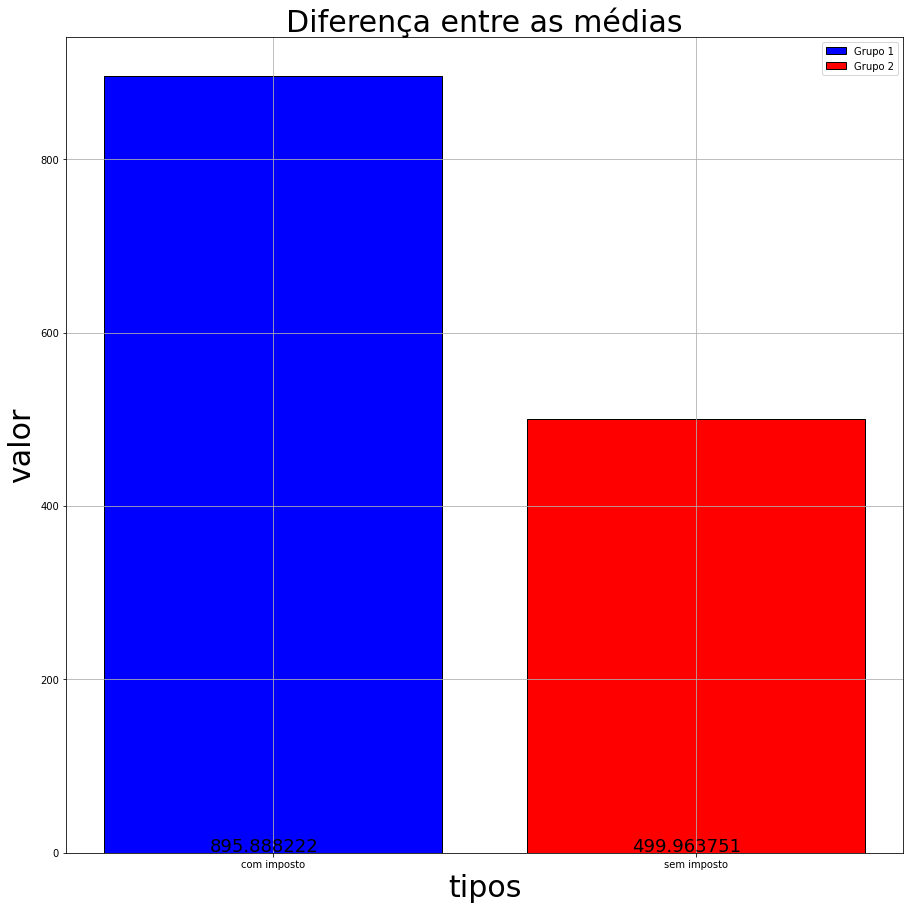

In [240]:
y1 = graf.PMC[1]
y2 = graf.SemImposto[1]
x1 = 'com imposto'
x2 = 'sem imposto'

plt.title("Diferença entre as médias", fontsize=30)
plt.xlabel("tipos", fontsize=30)
plt.ylabel("valor", fontsize=30)

plt.bar(x1,y1, label = 'Grupo 1', color='b',edgecolor='black') #adicionando legendas
plt.bar(x2,y2, label = 'Grupo 2', color='r',edgecolor='black')
plt.legend(loc='upper right')
plt.grid(True)


for i, v in enumerate(y):
    plt.text(i-.15, 
            v/y[i], 
            y[i], 
            fontsize=18, 
            color="black")

plt.show



In [237]:
graf.index[1]

'mean'